<a href="https://colab.research.google.com/github/yohe4274/2020SpringSeminar/blob/master/YOLOv3FineTuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Refarences

https://eng-memo.info/blog/yolo-original-dataset/

### Step 0 
- 編集→ノートブックの設定から，<br>
ランタイムのタイプをPython3に，ハードウェアアクセラレーターをGPUにする．

### Git clone 2020SpringSeminar repository in your branch.

- 以下のコマンドのmaster部分を自分のブランチ名に変更する．

In [36]:
!git clone -b master https://github.com/yohe4274/2020SpringSeminar.git

fatal: destination path '2020SpringSeminar' already exists and is not an empty directory.


In [2]:
%%bash
cd /content/2020SpringSeminar/ObjectDetection/
make

mkdir -p obj
mkdir -p backup
mkdir -p results
gcc -Iinclude/ -Isrc/ -DGPU -I/usr/local/cuda/include/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -DGPU -c ./src/gemm.c -o obj/gemm.o
gcc -Iinclude/ -Isrc/ -DGPU -I/usr/local/cuda/include/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -DGPU -c ./src/utils.c -o obj/utils.o
gcc -Iinclude/ -Isrc/ -DGPU -I/usr/local/cuda/include/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -DGPU -c ./src/cuda.c -o obj/cuda.o
gcc -Iinclude/ -Isrc/ -DGPU -I/usr/local/cuda/include/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -DGPU -c ./src/deconvolutional_layer.c -o obj/deconvolutional_layer.o
gcc -Iinclude/ -Isrc/ -DGPU -I/usr/local/cuda/include/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -DGPU -c ./src/convolutional_layer.c -o obj/convolutional_layer.o
gcc -Iinclude/ -Isrc/ -DGPU -I/usr/local/cuda/include/ -Wall -W

### Download YOLOv3 weight pretrained imagenet

In [34]:
!wget https://pjreddie.com/media/files/darknet53.conv.74

--2020-02-07 09:36:25--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  62.4MB/s    in 2.5s    

2020-02-07 09:36:28 (62.4 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



 ### Step 1 
 ### Training(Fine Tuning)

 - 以下のコマンドで学習を開始する．学習による重みファイル”〜〜-frozen_final.weightsf”が出力される．
 - **[重要] ランタイムアウトするとファイルが自動削除されるので学習が終わり次第ドライブに退避させる**


In [35]:
%%bash
cd ./2020SpringSeminar/ObjectDetection/
./darknet detector \
        train \
        cfg/JapaneseObject.data \
        cfg/JapaneseObject-frozen.cfg \
        /content/darknet53.conv.74 > /content/log

Process is terminated.


### Mounte Google Drive
- 重みの保存先のDriveをマウントする．

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### copy weight file to Dirve

- 以下のコマンドを，自分のドライブまでのパスに書き換える．
- !cp 2020SpringSeminar/ObjectDetection/backup/〜〜-* drive/My\ Drive/自分のパス

In [0]:
!cp 2020SpringSeminar/ObjectDetection/backup/JapaneseObject-* drive/My\ Drive/DensoT/SpringSeminar2020/

 ### Step 2
### Validation 
- 実際にドラレコの動画から得られるフレーム画像に対して検証してみる．
- threshに指定する値で画像に出力する識別結果を制限できる。0.1を指定した場合は「そのクラスである確率は10%以上」

In [3]:
!ls 2020SpringSeminar

labelImg  ObjectDetection  README.md  Resource	YOLOv3FineTuning.ipynb


#### Step2-1 まず1枚を検証する． 

In [32]:
%%bash
cp drive/My\ Drive/DensoTen/SpringSeminar2020/JapaneseObject-frozen_final.weights  2020SpringSeminar/ObjectDetection/
cd ./2020SpringSeminar/ObjectDetection/
cp -rf ../Resource/Validation/Torii/route3_000117.jpg .

# sudo ./darknet detector test cfg/JapaneseObject.data cfg/JapaneseObject.cfg JapaneseObject-frozen_final.weights route3_000117.jpg -thresh 0.5
sudo ./darknet detector test cfg/JapaneseObject.data cfg/JapaneseObject.cfg JapaneseObject-frozen_final.weights ../Resource/Validation/Torii/route3_000121.jpg -thresh 0.1


../Resource/Validation/Torii/route3_000121.jpg: Predicted in 0.318208 seconds.


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

In [30]:
!ls

2020SpringSeminar  drive  sample_data


#### Step 2-1 画像を描画する

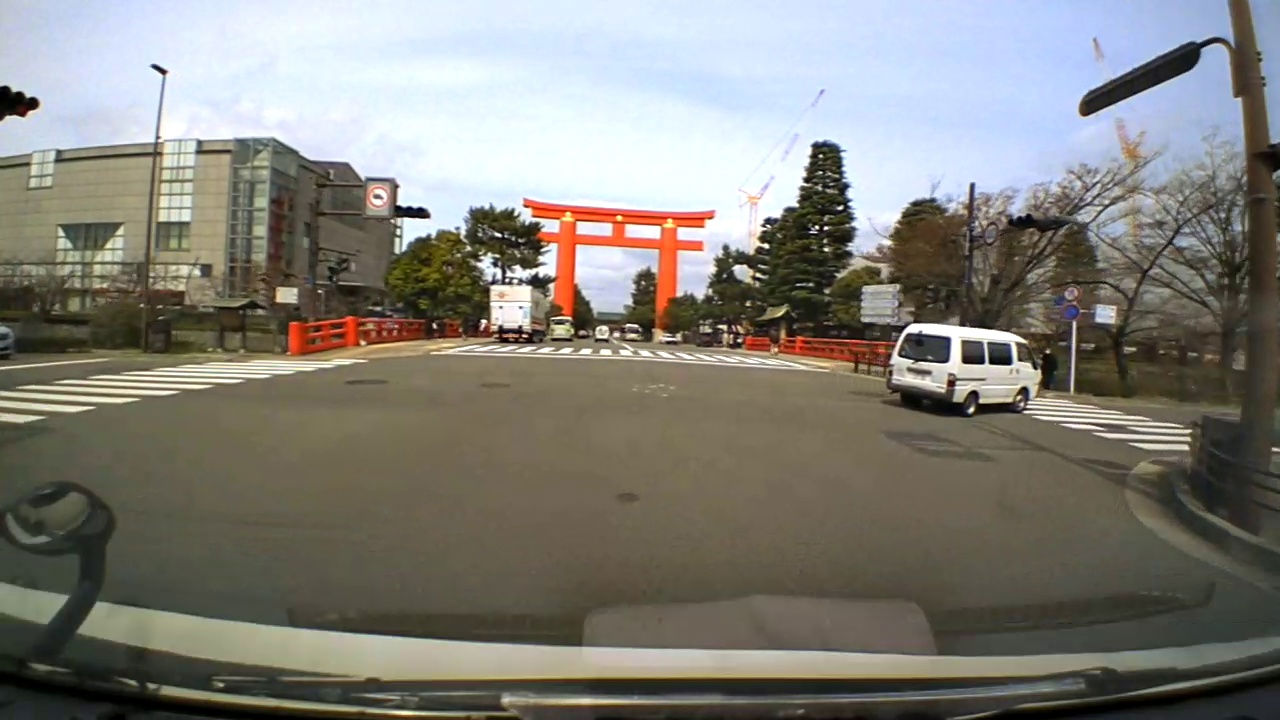

In [33]:
from IPython.display import Image,display_jpeg
display_jpeg(Image('2020SpringSeminar/ObjectDetection/predictions.jpg'))

#### Step 2-2 Apply YOLOv3 to each images

In [0]:
import os
import glob
import shutil

direct='/content/gdrive/My Drive/InternshipDerick/data/*'
new_dir_path='/content/gdrive/My Drive/InternshipDerick/output'
os.makedirs(new_dir_path, exist_ok=True)


files = glob.glob(direct)
direct = direct.replace(" ","\s")
os.chdir("JapaneseObjectDetection") 

for i, file in enumerate(files):
    file = "\""+file+"\""


    !./darknet detector test cfg/JapaneseObject.data cfg/JapaneseObject.cfg /content/gdrive/My\ Drive/InternshipDerick/JapaneseObject-frozen_final.weights $file -thresh 0.5
    
    path1="predictions.jpg"
    file = file.replace("\"", "")
    path2 = "/content/gdrive/My Drive/InternshipDerick/output/"+os.path.basename(file)
   
    # print(path2)
         
    shutil.move(path1, path2)

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

In [0]:
!ls

gdrive	sample_data


In [0]:
import os
# os.chdir("gdrive/My Drive/InternshipDerick/") 
!ls
!bash videos2frames.sh

data				   JapaneseObject-frozen_900.weights
JapaneseObject-frozen_100.weights  JapaneseObject-frozen.backup
JapaneseObject-frozen_200.weights  JapaneseObject-frozen_final.weights
JapaneseObject-frozen_300.weights  original.mp4
JapaneseObject-frozen_400.weights  output
JapaneseObject-frozen_500.weights  test_torii.png
JapaneseObject-frozen_600.weights  videos2frames.sh
JapaneseObject-frozen_700.weights  YOLOv3FineTuning.ipynb
JapaneseObject-frozen_800.weights
videos2frames.sh: line 6: $'\nThis script decompose a video into frames\nHow to use: replace path_to_videos and path_to_frames with real paths\n': command not found
Processing /content/gdrive/My Drive/InternshipDerick/original.mp4 file...
original.mp4
/content/gdrive/My Drive/InternshipDerick/original.mp4
original
ffmpeg version 3.4.6-0ubuntu0.18.04.1 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdi